Typically, data scientists will work with enormous types of file. Having the knowledge of these types of file and importing them properly will speed up the process of analyzing big amount of data.
In this post I will show how to import various types of data for anylyzing purpose using Python. Let's get into the track.

Firstly, I am importing some of the Python modules I will be using throughout the tutorial as follows

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Working with flat files
In this part we will import Flat files such as txt, csv and so on. 

The following code block will open a text file with read mode and then we are reading the file using read() method. Finally we are printing the file. Quite Easy!!

In [2]:
# opening 
file = open('data/seaslug.txt', mode='r')

# read a file
myFile = file.read()
print(myFile)


Time	Percent
99	0.067
99	0.133
99	0.067
99	0
99	0
0	0.5
0	0.467
0	0.857
0	0.5
0	0.357
0	0.533
5	0.467
5	0.467
5	0.125
5	0.4
5	0.214
5	0.4
10	0.067
10	0.067
10	0.333
10	0.333
10	0.133
10	0.133
15	0.267
15	0.286
15	0.333
15	0.214
15	0
15	0
20	0.267
20	0.2
20	0.267
20	0.437
20	0.077
20	0.067
25	0.133
25	0.267
25	0.412
25	0
25	0.067
25	0.133
30	0
30	0.071
30	0
30	0.067
30	0.067
30	0.133


Previously we read the whole file at once. We can even read file line by line as well. The readline() method do the job for us easily.

In [3]:
# importing text files line by line
with open('data/seaslug.txt') as file:
    print(file.readline())
    print(file.readline())

Time	Percent

99	0.067



We can use numpy to import data as well. Here we are importing csv file using numpy. In numpy loadtext() function we are passing
two arguments - the file and the delimter which is ',' for csv file.

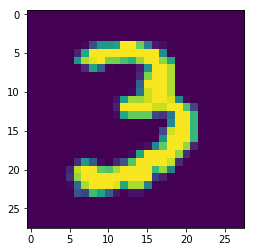

In [4]:
# importing data with numpy

# Import package
import numpy as np

# Assign filename to variable: file
file = 'data/mnist_kaggle_some_rows.csv'

# Load file as array: digits
digits = np.loadtxt(file, delimiter=',')

# Select and reshape a row
im = digits[9, 1:]
im_sq = np.reshape(im, (28, 28))

# Plot reshaped data (matplotlib.pyplot already loaded as plt)
plt.imshow(im_sq, interpolation='nearest')
plt.show()

Sometimes we need to import data without column name or title. We can do so easily by one more additional argument into 
numpy loadtxt() function called skiprows=1. It will skip the first row of the dataset.

In [5]:
# reading file without the name of the column-header

file = 'data/seaslug.txt'
data = np.loadtxt(file, delimiter='\t', skiprows=1)

In [6]:
# printing 5 rows to make sure first row (column name) is not there
print(data[:5])

[[9.90e+01 6.70e-02]
 [9.90e+01 1.33e-01]
 [9.90e+01 6.70e-02]
 [9.90e+01 0.00e+00]
 [9.90e+01 0.00e+00]]


We can import file which has both numeric and text value in it. By using numpy recfromcsv() function this job can be done very easily.

In [7]:
# importing file using recfromcsv funcion

file = 'data/titanic_sub.csv'
data = np.recfromcsv(file)
print(data[:3])

[(1, 0, 3, b'male', 22., 1, 0, b'A/5 21171',  7.25  , b'', b'S')
 (2, 1, 1, b'female', 38., 1, 0, b'PC 17599', 71.2833, b'C85', b'C')
 (3, 1, 3, b'female', 26., 0, 0, b'STON/O2. 3101282',  7.925 , b'', b'S')]


C:\Users\ICT_H\Anaconda3\lib\site-packages\numpy\lib\npyio.py:2266: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


Pandas is the best way to import file which gives a lot of flexibility. We can import csv file by using Pandas read_csv() function.
And then we can look into the first few line (by default 10) of data by using pandas head method

In [8]:
# Assign filename: file
file = 'data/titanic_sub.csv'

# Import file: data
data = pd.read_csv(file, sep=',', comment='#', na_values='NaN')

# Print the head of the DataFrame
print(data.head())

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S  


### Working with spreadsheets

We can import excel spreadsheet file by using pandas ExcelFile() funtion. In the following lines of code, first we are loading the
spreadsheet by using ExcelFile() function. And then we can use sheet_names() to know no of sheets in the spreadsheet. In the following
file it has two sheets names '2004' and '2002'. I am loading this sheets into padas dataframe usnig parse() function.

In [9]:
# importing xlsx

file = 'data/battledeath.xlsx'

# load spreadsheet
data = pd.ExcelFile(file)

# printing sheetnames
print('Sheet Names: \n',data.sheet_names, '\n')

# Load a sheet into a DataFrame by name: df1
df1 = data.parse('2004')

# Print the head of the DataFrame df1
print(df1.head())

print('\n')
# Load a sheet into a DataFrame by index: df2
df2 = data.parse('2002')

# Print the head of the DataFrame df2
print(df2.head())

Sheet Names: 
 ['2002', '2004'] 

  War(country)      2004
0  Afghanistan  9.451028
1      Albania  0.130354
2      Algeria  3.407277
3      Andorra  0.000000
4       Angola  2.597931


  War, age-adjusted mortality due to       2002
0                        Afghanistan  36.083990
1                            Albania   0.128908
2                            Algeria  18.314120
3                            Andorra   0.000000
4                             Angola  18.964560


### Working with SAS file
We can import sas file by using sas7bdat module. Here I am getting the file using SAS7BDAF and saving it as data frame with to_data_frame()
method. 

In [10]:
# Import sas7bdat package
from sas7bdat import SAS7BDAT

# Save file to a DataFrame: df_sas
with SAS7BDAT('data/sales.sas7bdat') as file:
    df_sas = file.to_data_frame()

# Print head of DataFrame
print(df_sas.head())

     YEAR     P           S
0  1950.0  12.9  181.899994
1  1951.0  11.9  245.000000
2  1952.0  10.7  250.199997
3  1953.0  11.3  265.899994
4  1954.0  11.2  248.500000


### Working with STATA file
We can easily import stata file with pandas read_stata function. You can learn about stata from wikipedia. Below I am have one state
dataset called disarea. I am importing this dataset using pandas read_stata funciton and printing 3 rows of data by using pandas head() 
method.

In [11]:
# loading stata file in pandas dataframe
file = 'data/disarea.dta'
df = pd.read_stata(file)

# printing first 3 lines
print(df.head(3))

  wbcode      country  disa1  disa2  disa3  disa4  disa5  disa6  disa7  disa8  \
0    AFG  Afghanistan   0.00   0.00   0.76   0.73    0.0    0.0   0.00    0.0   
1    AGO       Angola   0.32   0.02   0.56   0.00    0.0    0.0   0.56    0.0   
2    ALB      Albania   0.00   0.00   0.02   0.00    0.0    0.0   0.00    0.0   

    ...    disa16  disa17  disa18  disa19  disa20  disa21  disa22  disa23  \
0   ...       0.0     0.0     0.0    0.00     0.0     0.0    0.00    0.02   
1   ...       0.0     0.4     0.0    0.61     0.0     0.0    0.99    0.98   
2   ...       0.0     0.0     0.0    0.00     0.0     0.0    0.00    0.00   

   disa24  disa25  
0    0.00    0.00  
1    0.61    0.00  
2    0.00    0.16  

[3 rows x 27 columns]


### Working with Matlab file
Another popular type of file is called matlab file with extension .mat at the end. We can import such file by using scipy.io module
in Python. Here I am loading the file using scipy.io.loadmat() funcion by passing the mat file. And then checking the file type.
As we can see it belongs to Python dict class. That means we extract the keys out of it. We can go deeper by digging the value of these keys.

In [12]:
# Importing matlab file
import scipy.io

# assigning filename to file
file = 'data/ja_data2.mat'

# loading matlab file
mat = scipy.io.loadmat(file)

# check type of the file
print('Type of mat file', type(mat), '\n')

# extracting keys from mat file
for key in mat.keys():
    print(key)
    
# Print the type of the value corresponding to the key 'CYratioCyt'
print(type(mat['CYratioCyt']))

# Print the shape of the value corresponding to the key 'CYratioCyt'
print(np.shape(mat['CYratioCyt']))

Type of mat file <class 'dict'> 

__header__
__version__
__globals__
rfpCyt
rfpNuc
cfpNuc
cfpCyt
yfpNuc
yfpCyt
CYratioCyt
<class 'numpy.ndarray'>
(200, 137)


### Working with Database file

It's quite obvious to work with databases while working in company. That's why good understanding of databases is the key skill of 
data scientist. We can use sqlalchemy to work with databases. 

In the following lines of code first we are importing create_engine from sqlalchemy which we will be using to establish engine and connection 
with databases. We are creating the engine by passing the appropriate argument such as the type of file we will be working with which is sqlite. As we
know, databases are consist of tables. We can extrct the table by using table_names() method which will return a list of 
tables names avaailable in the database file. 

In [13]:
# Working with databases

# importing necessary module
from sqlalchemy import create_engine

# Create engine
engine = create_engine('sqlite:///data/Chinook.sqlite')

# creating a list with table names contains in engine
table_names = engine.table_names()

# printing table names
print(table_names)

['Album', 'Artist', 'Customer', 'Employee', 'Genre', 'Invoice', 'InvoiceLine', 'MediaType', 'Playlist', 'PlaylistTrack', 'Track']


Now we know what tables are avaiable in our datadase file. It's time to execute some sqlite queries. First we establish
connection using connect() method and then execute any query with the execute() funtion. Below we are seleting everything from
Album table and passing it to the pandas DataFrame() funciton to create dataframe for us.

In [14]:
# opening engine connection
con = engine.connect()

# Perform query 
rs = con.execute('SELECT * FROM Album')

# saving to dataframe
df = pd.DataFrame(rs.fetchall(), columns=rs.keys())

# close connection
con.close()

# printing our datafrmae
print(df.head())

   AlbumId                                  Title  ArtistId
0        1  For Those About To Rock We Salute You         1
1        2                      Balls to the Wall         2
2        3                      Restless and Wild         2
3        4                      Let There Be Rock         1
4        5                               Big Ones         3


Below is the shorter version to establish connection and execute queries on database where we don't need to care about
closing the connection. Below codeblock pretty much does the same as above except here I am executing several queries and 
capturing into different dataframes.

In [15]:
# better way
with engine.connect() as con:
    rs = con.execute('SELECT LastName, Title FROM Employee')
    df = pd.DataFrame(rs.fetchmany(size=10), columns = rs.keys())
    
    rs2 = con.execute('SELECT * FROM Employee ORDER BY BirthDate')
    df2 = pd.DataFrame(rs2.fetchall(), columns=rs2.keys())
    
    rs3 = con.execute("SELECT Title, Name FROM Album INNER JOIN Artist on Album.ArtistID = Artist.ArtistID")
    df3 = pd.DataFrame(rs3.fetchall(), columns=rs3.keys())
  
    
print(df.head())
print('\n')
print(df2.head(2),'\n')
print(df3.head(3))

  LastName                Title
0    Adams      General Manager
1  Edwards        Sales Manager
2  Peacock  Sales Support Agent
3     Park  Sales Support Agent
4  Johnson  Sales Support Agent


   EmployeeId LastName FirstName                Title  ReportsTo  \
0           4     Park  Margaret  Sales Support Agent        2.0   
1           2  Edwards     Nancy        Sales Manager        1.0   

             BirthDate             HireDate           Address     City State  \
0  1947-09-19 00:00:00  2003-05-03 00:00:00  683 10 Street SW  Calgary    AB   
1  1958-12-08 00:00:00  2002-05-01 00:00:00      825 8 Ave SW  Calgary    AB   

  Country PostalCode              Phone                Fax  \
0  Canada    T2P 5G3  +1 (403) 263-4423  +1 (403) 263-4289   
1  Canada    T2P 2T3  +1 (403) 262-3443  +1 (403) 262-3322   

                      Email  
0  margaret@chinookcorp.com  
1     nancy@chinookcorp.com   

                                   Title    Name
0  For Those About To Rock We Sa

Here is the Pandas way of interacting with database file. We can use pandas read_sql_query() function do our job by passing the 
query we want to execute and the engine. [engine is defined eartier]

In [16]:
# we can
df = pd.read_sql_query('SELECT * FROM Employee WHERE EmployeeId >=6 ORDER BY BirthDate', engine)

# Print head of DataFrame
print(df.head())

   EmployeeId  LastName FirstName       Title  ReportsTo            BirthDate  \
0           8  Callahan     Laura    IT Staff          6  1968-01-09 00:00:00   
1           7      King    Robert    IT Staff          6  1970-05-29 00:00:00   
2           6  Mitchell   Michael  IT Manager          1  1973-07-01 00:00:00   

              HireDate                      Address        City State Country  \
0  2004-03-04 00:00:00                  923 7 ST NW  Lethbridge    AB  Canada   
1  2004-01-02 00:00:00  590 Columbia Boulevard West  Lethbridge    AB  Canada   
2  2003-10-17 00:00:00         5827 Bowness Road NW     Calgary    AB  Canada   

  PostalCode              Phone                Fax                    Email  
0    T1H 1Y8  +1 (403) 467-3351  +1 (403) 467-8772    laura@chinookcorp.com  
1    T1K 5N8  +1 (403) 456-9986  +1 (403) 456-8485   robert@chinookcorp.com  
2    T3B 0C5  +1 (403) 246-9887  +1 (403) 246-9899  michael@chinookcorp.com  


This is my first post in Medium, a small step to help people with my knowlege and learn as well. Humbly speaking, this knowledge
of importing file and the datasets I have gained from Datacamp.com. Till the next post stay well. Thanks for reading my post. Feel
free to leave your comments on the topic and how can I imporve my writing to make people understand better.